# 1- Importation des librairies pour tester les différents modèles

In [ ]:
pip install lazypredict

In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: scipy>=0.19.1 in c:\users\hp\anaconda3\lib\site-packages (from imbalanced-learn) (1.5.2)



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
#from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from xgboost import XGBClassifier
from sklearn.svm import NuSVC
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import timeit, time
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [182]:
train = pd.read_csv('train_final.csv')

In [183]:
train.set_index('id', inplace = True)

In [184]:
train

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,employment,savings_status,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,
786,0.004720,0.145779,-0.887544,0.126188,-0.763359,1.048759,-0.436436,2,3,1,...,0,1,0,0,1,0,0,1,0,0
874,0.254628,-0.365745,0.917630,1.042068,1.439486,1.048759,-0.436436,0,4,2,...,1,0,0,0,1,0,0,1,0,0
66,-0.745002,-0.699364,0.917630,-0.789692,-0.058449,1.048759,-0.436436,0,2,1,...,0,1,0,0,1,0,0,1,0,0
903,0.254628,-0.311335,0.917630,-0.789692,0.734575,1.048759,2.291288,0,2,3,...,0,1,0,0,1,0,0,1,0,0
318,1.254257,0.433221,-0.887544,-0.789692,-0.499018,1.048759,-0.436436,2,2,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,-0.745002,-0.766660,0.917630,0.126188,-0.587132,1.048759,-0.436436,2,3,1,...,0,1,0,0,1,0,0,1,0,0
193,-0.911606,-0.705091,0.917630,-0.789692,-1.115814,-0.705670,-0.436436,3,1,1,...,0,1,0,0,1,0,0,1,0,0
630,-1.411421,-0.626698,-1.790132,-0.789692,-0.587132,-0.705670,2.291288,3,1,0,...,0,1,0,0,1,0,0,0,0,1


# 2- Determination de la target value et split du dataset

In [185]:
y= train['class']
del train['class']
X = train

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [187]:
X_train.shape

(720, 47)

In [188]:
y_train.shape

(720,)

In [189]:
X_test.shape

(180, 47)

In [190]:
y_test.shape

(180,)

In [191]:
y_train.value_counts()

1    503
0    217
Name: class, dtype: int64

# Equilibre des classes Good et Bad par la méthode du suréchantillonage ou oversampling

In [192]:
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 2, random_state = 0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [193]:
print("After Undersampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After Undersampling, counts of label '1': 503
After Undersampling, counts of label '0': 503


# 3- Teste des diiférents algorithmes de façon native et visualisation des cas d'overfitting

Regression Logistique

Train Score Regression Logistique: 0.8290258449304175
Test Score Regression Logistique: 0.7222222222222222


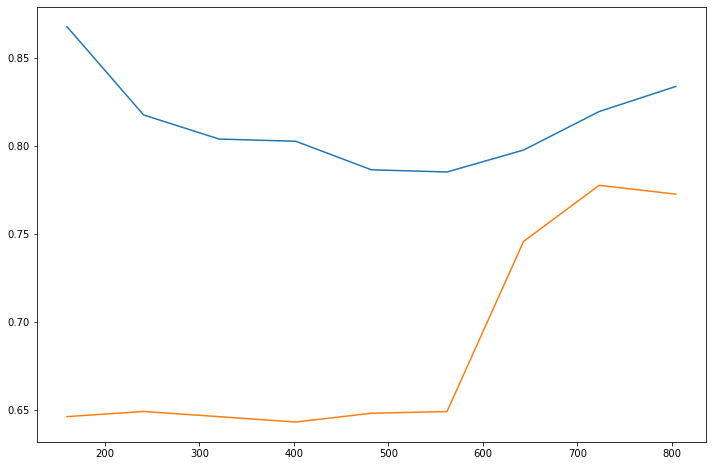

In [121]:
log = LogisticRegression()
log.fit(X_train_res, y_train_res.ravel())
print('Train Score Regression Logistique:', log.score(X_train_res, y_train_res))
print('Test Score Regression Logistique:', log.score(X_test, y_test))


N, train_score, val_score = learning_curve(log, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

KNN

Train Score KNN: 0.8429423459244533
Test ScoreKNN: 0.5833333333333334


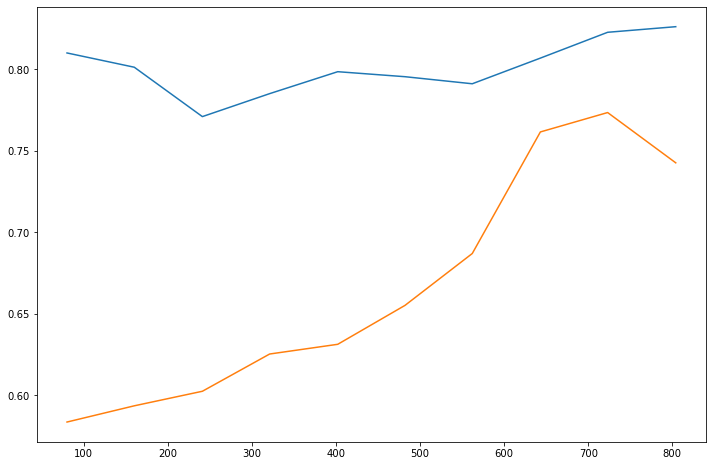

In [122]:
kn = KNeighborsClassifier()
kn.fit(X_train_res, y_train_res)
print('Train Score KNN:', kn.score(X_train_res, y_train_res))
print('Test ScoreKNN:', kn.score(X_test, y_test))

N, train_score, val_score = learning_curve(kn, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Naive Bayes

Train Score Naive Bayes: 0.7594433399602386
Test Score Naive Bayes: 0.6833333333333333


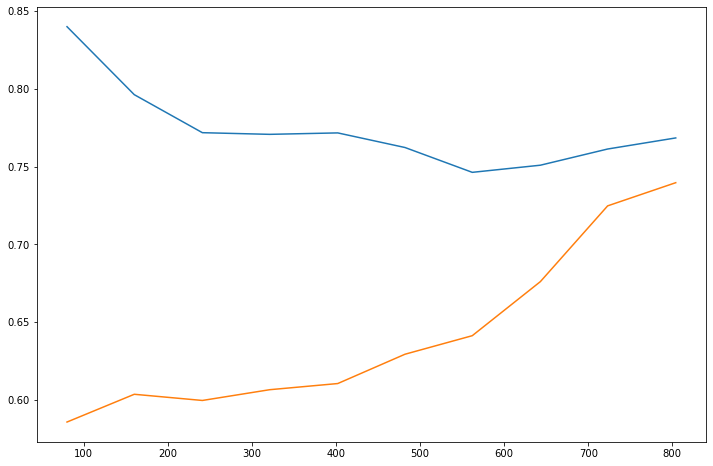

In [123]:
nb = BernoulliNB()
nb.fit(X_train_res, y_train_res)
print('Train Score Naive Bayes:', nb.score(X_train_res, y_train_res))
print('Test Score Naive Bayes:', nb.score(X_test, y_test))

N, train_score, val_score = learning_curve(nb, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

SVC

Train Score SVC: 0.8936381709741551
Test Score SVC: 0.7111111111111111


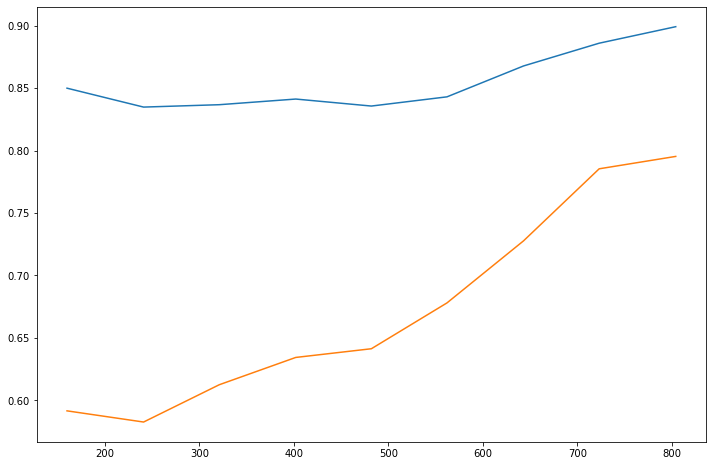

In [124]:
svc = SVC()
svc.fit(X_train_res, y_train_res)
print('Train Score SVC:', svc.score(X_train_res, y_train_res))
print('Test Score SVC:', svc.score(X_test, y_test))


N, train_score, val_score = learning_curve(svc, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

Random Forest

Train Score random forest: 1.0
Test Score random forest: 0.7444444444444445


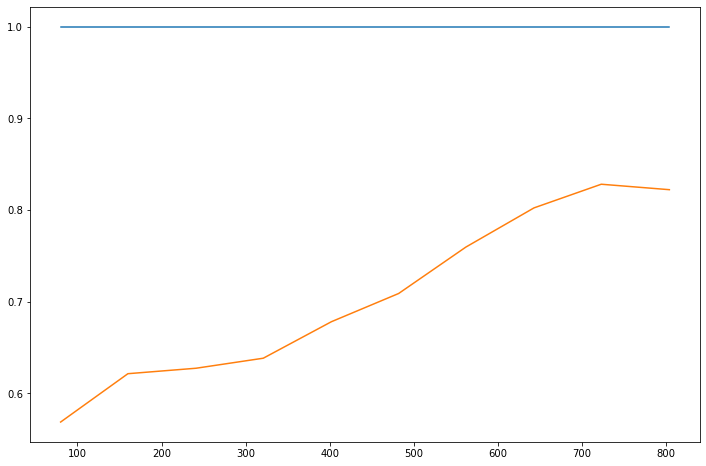

In [195]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
print('Train Score random forest:', rf.score(X_train_res, y_train_res))
print('Test Score random forest:', rf.score(X_test, y_test))


N, train_score, val_score = learning_curve(rf, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

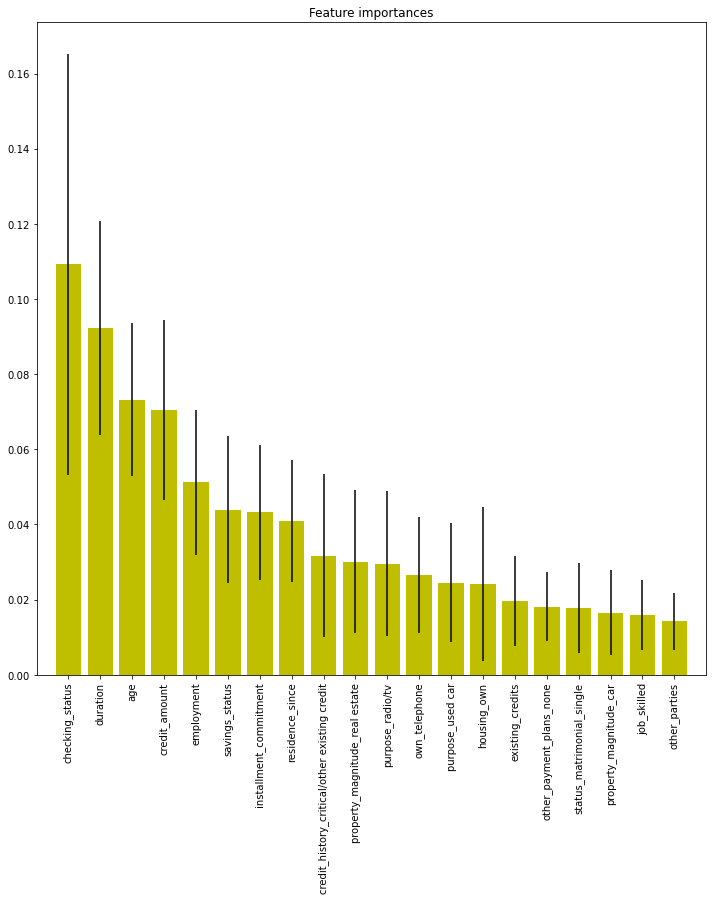

In [198]:
feat_names = X_train.columns.values
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

# 4- Application du GridSearch pour trouver les hyperparamètres optimaux pour les modèles 

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, recall_score,roc_auc_score, roc_curve


In [130]:
# Pour la RL

paramRL = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C' : range(0, 10),
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
}

gridRL = GridSearchCV(LogisticRegression(), paramRL, cv = 5)
gridRL.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(0, 10),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [131]:
gridRL.best_score_

0.7844588936505591

In [132]:
gridRL.best_params_

{'C': 0, 'penalty': 'none', 'solver': 'newton-cg'}

In [133]:
start = timeit.default_timer()

modelRL = gridRL.best_estimator_
modelRL.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelRL.score(X_train_res, y_train_res))
print("test:",modelRL.score(X_test, y_test))

Le temps dexecution est de :0.0035851000002367073
train: 0.8349900596421471
test: 0.7111111111111111


0.7222222222222222
[[ 23  33]
 [ 17 107]]
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        56
           1       0.76      0.86      0.81       124

    accuracy                           0.72       180
   macro avg       0.67      0.64      0.64       180
weighted avg       0.71      0.72      0.71       180



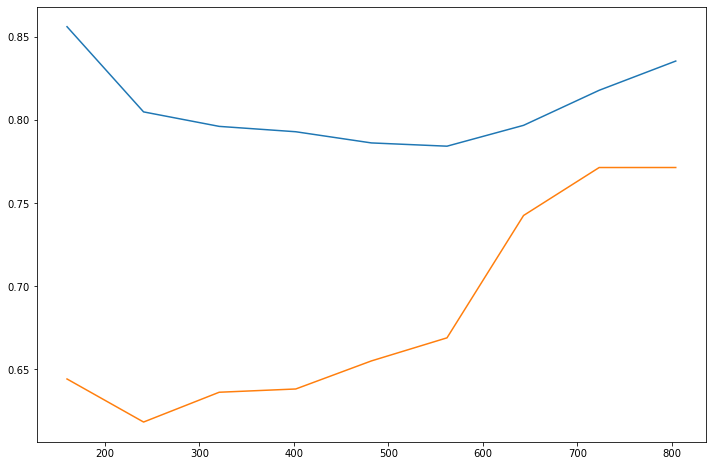

In [135]:
RL = LogisticRegression(C=1, penalty = "l1", solver = "saga")
RL.fit(X_train_res, y_train_res)
y_pred_RL = RL.predict(X_test)
print(accuracy_score(y_pred_RL, y_test))
print(confusion_matrix(y_test, y_pred_RL))
print(classification_report(y_test, y_pred_RL))

N, train_score, val_score = learning_curve(RL, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

# a- Pour le KNN

In [136]:
paramKNN = {'n_neighbors': range(1, 50),
            'weights': ['uniform','distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'metric': ['euclidean','manhattan', 'minkowski']}
gridKNN = GridSearchCV(KNeighborsClassifier(), paramKNN, cv=5)
gridKNN.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [137]:
gridKNN.best_score_

0.8191222107285355

In [138]:
gridKNN.best_params_

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [139]:
start = timeit.default_timer()

modelKNN = gridKNN.best_estimator_
modelKNN.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelKNN.score(X_train_res, y_train_res))
print("test:", modelKNN.score(X_test, y_test))


Le temps dexecution est de :0.03234710000015184
train: 1.0
test: 0.6055555555555555


In [146]:
KNN = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  1,
 weights= 'uniform')

KNN.fit(X_train_res, y_train_res)
y_pred_KNN = KNN.predict(X_test)
print(accuracy_score(y_pred_KNN, y_test))
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

0.6055555555555555
[[32 24]
 [47 77]]
              precision    recall  f1-score   support

           0       0.41      0.57      0.47        56
           1       0.76      0.62      0.68       124

    accuracy                           0.61       180
   macro avg       0.58      0.60      0.58       180
weighted avg       0.65      0.61      0.62       180



In [141]:
#pd.DataFrame(KNN.feature_importances_, index = X_train.columns)

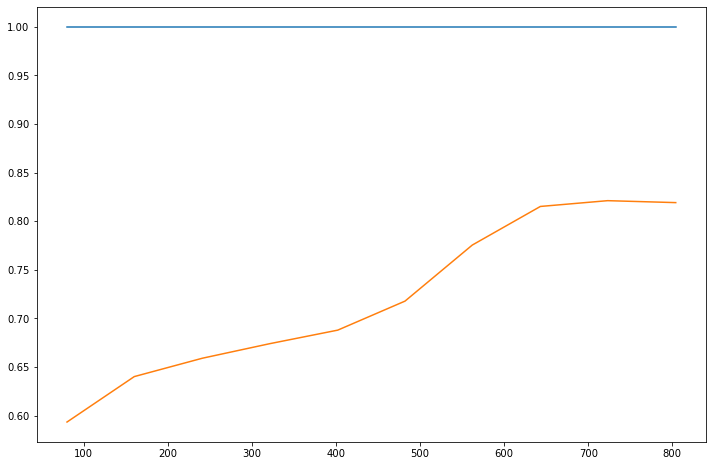

In [147]:
N, train_score, val_score = learning_curve(KNN, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

# b- Pour Naive-Bayes

In [148]:
paramNB = {'alpha' : np.arange(1e-3, 13),
           
           }
gridNB = GridSearchCV(BernoulliNB(), paramNB, cv=5)
gridNB.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01])})

In [149]:
gridNB.best_score_

0.7426038126200679

In [150]:
gridNB.best_params_

{'alpha': 10.000999999999998}

In [151]:
start = timeit.default_timer()

modelNB = gridNB.best_estimator_
modelNB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelNB.score(X_train_res, y_train_res))
print("test:",modelNB.score(X_test, y_test))


Le temps dexecution est de :0.003939899999750196
train: 0.7584493041749503
test: 0.6944444444444444


0.6944444444444444
[[32 24]
 [31 93]]
              precision    recall  f1-score   support

           0       0.51      0.57      0.54        56
           1       0.79      0.75      0.77       124

    accuracy                           0.69       180
   macro avg       0.65      0.66      0.65       180
weighted avg       0.71      0.69      0.70       180



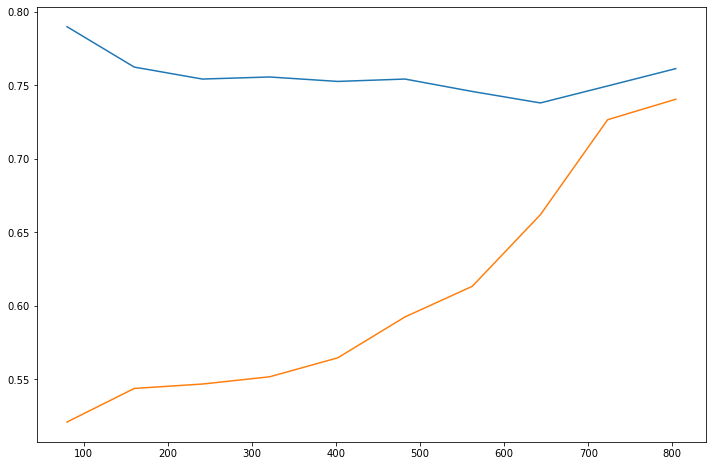

In [152]:
NB = BernoulliNB(alpha = 10.00099)

NB.fit(X_train_res, y_train_res)
y_pred_NB = NB.predict(X_test)
print(accuracy_score(y_pred_NB, y_test))
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

N, train_score, val_score = learning_curve(NB, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

## c- Pour SVC

In [153]:
from sklearn.svm import SVC
paramSVC = {'C' : np.arange(10, 23),
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridSVC = GridSearchCV(SVC(), paramSVC, cv=5)
gridSVC.fit(X_train_res, y_train_res)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [154]:
gridSVC.best_score_

0.8013152061474804

In [155]:
gridSVC.best_params_

{'C': 17, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}

In [156]:
start = timeit.default_timer()

modelSVC = gridSVC.best_estimator_
modelSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelSVC.score(X_train_res, y_train_res))
print("test:", modelSVC.score(X_test, y_test))


Le temps dexecution est de :0.009481099999902654
train: 0.9532803180914513
test: 0.7277777777777777


0.7333333333333333
[[ 28  28]
 [ 20 104]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        56
           1       0.79      0.84      0.81       124

    accuracy                           0.73       180
   macro avg       0.69      0.67      0.68       180
weighted avg       0.72      0.73      0.73       180



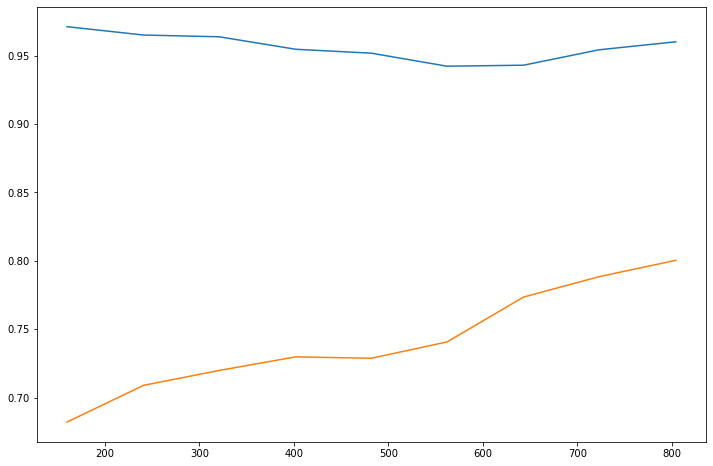

In [157]:
SVC = SVC(C= 16, decision_function_shape = "ovo", gamma = "auto", kernel = "rbf")

SVC.fit(X_train_res, y_train_res)
y_pred_SVC = SVC.predict(X_test)
print(accuracy_score(y_pred_SVC, y_test))
print(confusion_matrix(y_test, y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

N, train_score, val_score = learning_curve(SVC, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

## d- Pour la foret aléatoire

In [158]:
from sklearn.ensemble import RandomForestClassifier

paramRF = {'n_estimators' : np.arange(37, 41),
           'criterion' : ['gini', 'entropy'],
            'max_depth' : np.arange(11, 16),  
            'max_features': ['auto', 'sqrt', 'log2']
           }
gridRF = GridSearchCV(RandomForestClassifier(), paramRF, cv=5)
gridRF.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([11, 12, 13, 14, 15]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([37, 38, 39, 40])})

In [159]:
gridRF.best_score_

0.836077040539875

In [160]:
gridRF.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'n_estimators': 39}

In [161]:
start = timeit.default_timer()

modelRF = gridRF.best_estimator_
modelRF.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print(modelRF.score(X_test, y_test))


Le temps dexecution est de :0.01900610000029701
0.7055555555555556


In [180]:
RF = RandomForestClassifier(criterion = 'gini',
 max_depth = 13,
 max_features = 'auto',
 n_estimators = 39)

RF.fit(X_train_res, y_train_res)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

0.7333333333333333
[[ 30  26]
 [ 22 102]]
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        56
           1       0.80      0.82      0.81       124

    accuracy                           0.73       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.73      0.73      0.73       180



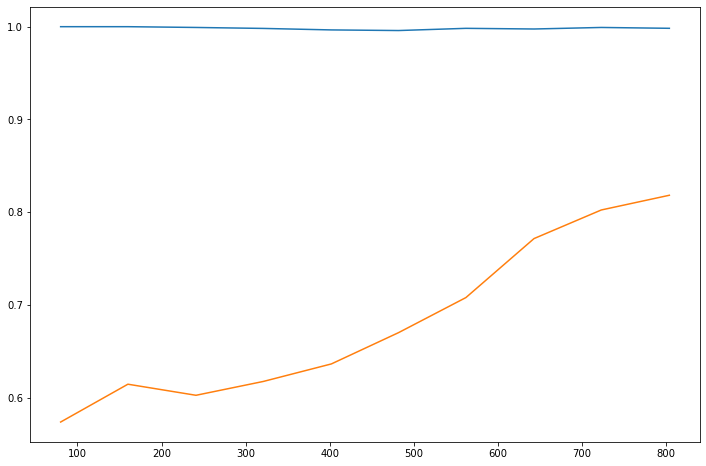

In [181]:
N, train_score, val_score = learning_curve(RF, X_train_res, y_train_res, scoring = 'accuracy',cv = 5,
                                           train_sizes = np.linspace(0.1, 1, 10))
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, val_score.mean(axis = 1), label = 'validation score')

## e- Pour le Bagging Classifier

from sklearn.ensemble import BaggingClassifier

paramBG = {
    'n_estimators' : np.arange(7, 15),
    'max_samples' : np.arange(0.01, 5),
    'max_features' : np.arange(0.01, 5),
    'verbose' : np.arange(1, 5)
}

gridBG = GridSearchCV(BaggingClassifier(), paramBG, cv = 5)
gridBG.fit(X_train, y_train)

gridBG.best_score_

gridBG.best_params_

start = timeit.default_timer()

modelBG = gridBG.best_estimator_
modelBG.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelBG.score(X_train, y_train))
print("test:", modelBG.score(X_test, y_test))



BG = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance'),
n_estimators = 13)
BG.fit(X_train, y_train)
y_pred_BG = BG.predict(X_test)
print(accuracy_score(y_pred_BG, y_test))
print(confusion_matrix(y_test, y_pred_BG))
print(classification_report(y_test, y_pred_BG))

# f- Pour NuSVC

In [168]:
from sklearn.svm import NuSVC
paramNuSVC = {
           'kernel' : ['linear', 'poly','rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape': ['ovo', 'ovr']
           }
gridNuSVC = GridSearchCV(NuSVC(), paramNuSVC, cv=5)
gridNuSVC.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [169]:
gridNuSVC.best_score_

0.7973400325107138

In [170]:
gridNuSVC.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}

In [172]:
start = timeit.default_timer()

modelNuSVC = gridNuSVC.best_estimator_
modelNuSVC.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelNuSVC.score(X_train_res, y_train_res))
print("test:", modelNuSVC.score(X_test, y_test))


Le temps dexecution est de :0.010418800000479678
train: 0.9294234592445328
test: 0.7222222222222222


In [173]:
NuSVC = NuSVC(decision_function_shape ='ovo', gamma= 'scale', kernel= 'rbf')

NuSVC.fit(X_train_res, y_train_res)
y_pred_NuSVC = NuSVC.predict(X_test)
print(accuracy_score(y_pred_NuSVC, y_test))
print(confusion_matrix(y_test, y_pred_NuSVC))
print(classification_report(y_test, y_pred_NuSVC))

0.7222222222222222
[[ 24  32]
 [ 18 106]]
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        56
           1       0.77      0.85      0.81       124

    accuracy                           0.72       180
   macro avg       0.67      0.64      0.65       180
weighted avg       0.71      0.72      0.71       180



# g- Pour XGBClassifier

In [174]:
from xgboost import XGBClassifier

paramXGB = { 
    'booster': ['gbtree','gblinear'],
    'eta' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2],
}
gridXGB = GridSearchCV(XGBClassifier(), paramXGB, cv=5)
gridXGB.fit(X_train_res, y_train_res)

[11:13:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:13:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:13:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:13:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:13:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [175]:
gridXGB.best_score_

0.8201664942613665

In [176]:
gridXGB.best_params_

{'booster': 'gbtree', 'eta': 0.1}

In [177]:
start = timeit.default_timer()

modelXGB = gridXGB.best_estimator_
modelXGB.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelXGB.score(X_train, y_train))
print("test:", modelXGB.score(X_test, y_test))


Le temps dexecution est de :0.0053517999995165155
train: 0.9972222222222222
test: 0.7611111111111111


In [179]:
XGB = XGBClassifier(booster = "gbtree", eta= 0.1)

XGB.fit(X_train_res, y_train_res)
y_pred_XGB = XGB.predict(X_test)
print(accuracy_score(y_pred_XGB, y_test))
print(confusion_matrix(y_test, y_pred_XGB))
print(classification_report(y_test, y_pred_XGB))

[11:14:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7611111111111111
[[ 29  27]
 [ 16 108]]
              precision    recall  f1-score   support

           0       0.64      0.52      0.57        56
           1       0.80      0.87      0.83       124

    accuracy                           0.76       180
   macro avg       0.72      0.69      0.70       180
weighted avg       0.75      0.76      0.75       180



## h- Pour AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

paramAda = { 
    'n_estimators': np.arange(85, 102),
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state': np.arange(1, 10)
}
gridAda = GridSearchCV(AdaBoostClassifier(), paramAda, cv=5, scoring="accuracy")
gridAda.fit(X_train, y_train)

In [ ]:
gridAda.best_score_

In [ ]:
gridAda.best_params_

In [ ]:
start = timeit.default_timer()

modelAda = gridAda.best_estimator_
modelAda.score(X_test, y_test)

stop = timeit.default_timer()
execution_time = stop - start
print("Le temps dexecution est de :" +str(execution_time))
print("train:",modelAda.score(X_train, y_train))
print("test:", modelAda.score(X_test, y_test))


In [ ]:
Ada = AdaBoostClassifier()

Ada.fit(X_train, y_train)
y_pred_Ada = Ada.predict(X_test)
print(accuracy_score(y_pred_Ada, y_test))
print(confusion_matrix(y_test, y_pred_Ada))
print(classification_report(y_test, y_pred_Ada))

# 5- Comparatif des différents modèles et choix du meilleur modèle

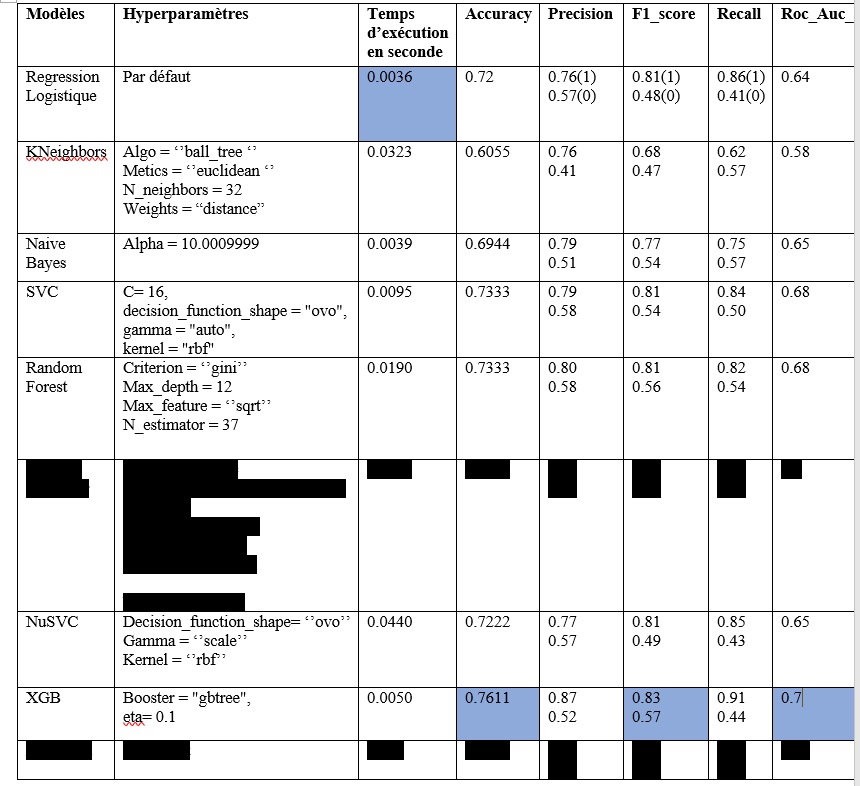

Après la visualisation de ce tableau comparatif, nous pouvons dire que le meilleur modèle est le le XGBClassifier car il a un meilleur accuracy score qui est de 0.7611 avec un temps d'exécution qui est de 0.0050 secondes

Le modèle le plus rapide est le RandomForest avec un temps d'execution de 0.0036 secondes

# 6- Utilisation des méthodes d'ensemble

# a- Voting Classifier

In [66]:
#from sklearn.ensemble import VotingClassifier

model_1 = KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance')

model_2 =  RandomForestClassifier()

model_3 = SVC(C = 15, decision_function_shape = "ovo", gamma = "auto", kernel = "rbf")
model_4 = VotingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          voting = 'hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

# b- Bagging

model = BaggingClassifier(base_estimator =KNeighborsClassifier(algorithm= 'ball_tree',
 metric = 'euclidean',
 n_neighbors=  32,
 weights= 'distance'),
n_estimators = 13)

model.fit(X_train, y_train)
model.score(X_test, y_test)

# c- Stacking

In [320]:
#from sklearn.ensemble import StackingClassifier

model_4 = StackingClassifier([('KNN', model_1),
                            ('RandomForest', model_2),
                            ('SVC', model_3)],
                          final_estimator = RandomForestClassifier(criterion = 'gini',
 max_depth = 12,
 max_features = 'sqrt',
 n_estimators = 37))

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [70]:
from tpot import TPOTClassifier

In [71]:
tpot = TPOTClassifier(generations = 15, verbosity = 2, population_size = 721, n_jobs = -1)
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.7625

Generation 2 - Current best internal CV score: 0.7625

Generation 3 - Current best internal CV score: 0.7625000000000001

Generation 4 - Current best internal CV score: 0.7625000000000001

Generation 5 - Current best internal CV score: 0.7777777777777779

Generation 6 - Current best internal CV score: 0.7777777777777779

Generation 7 - Current best internal CV score: 0.7777777777777779

Generation 8 - Current best internal CV score: 0.7777777777777779

Generation 9 - Current best internal CV score: 0.7777777777777779

Generation 10 - Current best internal CV score: 0.7777777777777779

Generation 11 - Current best internal CV score: 0.7777777777777779

Generation 12 - Current best internal CV score: 0.7777777777777779

Generation 13 - Current best internal CV score: 0.7777777777777779

Generation 14 - Current best internal CV score: 0.7777777777777779

Generation 15 - Current best internal CV score: 0.7777777777777779

Best pipelin

TPOTClassifier(generations=15, n_jobs=-1, population_size=721, verbosity=2)

In [72]:
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=SGDClassifier(alpha=0.01, eta0=0.1,
                                                           fit_intercept=False,
                                                           l1_ratio=0.5,
                                                           learning_rate='invscaling',
                                                           loss='log',
                                                           penalty='elasticnet'))),
                ('selectfrommodel',
                 SelectFromModel(estimator=ExtraTreesClassifier(criterion='entropy',
                                                                max_features=0.5),
                                 threshold=0.0)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.5, min_samples_leaf=14,
                                      min_samples_split=14))])

In [73]:
tpot.score(X_test, y_test)

0.7388888888888889